
# Scenario Analysis Workshop:  Capital Budgeting using Monte Carlo Simulations
###**Financial Models**
### Diego Alonso Garcia
### Professor Aurelio Vasquez


**Objectives:**

The purpose of this exercise is to calculate the IRR and NPV of a capital budgeting project. Instead of assuming a single value for the input variables or relying on the common "Bad," "Base," and "Good" scenarios, some variables are treated as stochastic, each following its own probability distribution. By running thousands of simulations, we obtain more robust estimates of the project’s NPV and IRR.

## **Question 1: NPV and IRR calculator**

First, let´s calcualte the NPV and IRR for a set of CashFlows.

**Assumptions**

The discount rate is 12%
The inputs are already the total after-tax Free Cash Flows:

Year 0: -20,000
Year 1: 5,800
Year 2: 6,052
Year 3: 6,319
Year 4: 6,602
Year 5: 8,102

In [ ]:
# Install the numpy-financial library
!pip install numpy-financial

# Importing the necessary library
import numpy_financial as npf

# Modifiable inputs
discount_rate = 0.12  # Discount rate (as a decimal)
cash_flows = [-20000, 5800, 6052, 6319, 6602, 8102]  # Cash flows for each year

# Calculating NPV
npv = npf.npv(discount_rate, cash_flows)

# Calculating IRR
irr = npf.irr(cash_flows)

# Displaying the results
print(f"Net Present Value (NPV): {npv:.2f}")
print(f"Internal Rate of Return (IRR): {irr:.2%}")

Net Present Value (NPV): 3293.91
Internal Rate of Return (IRR): 18.11%


Now, we're going to calculate the NPV and IRR for some CF using a function with the following variables as inputs:

def calculate_npv_irr(salvage_value, unit_sales_year1, sales_growth, sale_price_per_unit, cash_operating_expenses_percentage).

The output should be the NPV and the IRR of the proyect

---

For the calculation of the variables:

1. unit_sales_year1: Input manually
2. sales_growth: Unit sales growth after year 1. Constant for years 2-5
3. Sale_price_per_unit: Input manually, constant for all five years
4. cash_operating_expenses_percentage: Input as a percentage of total revenue (Sales*Price) for every year
5. Salvage Value: Input manually

---
The function should begin with the following fixed values:

1. Life of the project = 5  (number of years of the FCF)
2. Discount rate = 12%
3. Tax rate = 40%
4. Fixed capital investment = 20,000
5. Depreciation = Fixed Capital Investment / Life of the Proyect

To calculate the Flows:

Year 0 or first FCF = Negative of the Fixed Capital Investment

Year 1-4 = (unit_sales_year1*[(1+sales_growth)^(Year t -1)]*(1-cash_operating_expenses_percentage) - Depreciation)*(1-Tax rate) + Depreciation

Year 5 or last FCF = The same as year 1-4 + Salvage Value*(1- Tax rate)

In [ ]:
import numpy_financial as npf

# Function to calculate NPV and IRR
def calculate_npv_irr(
    salvage_value,
    unit_sales_year1,
    sales_growth,
    sale_price_per_unit,
    cash_operating_expenses_percentage
):
    # Fixed values
    life_of_project = 5  # Years
    discount_rate = 0.12  # 12% discount rate
    tax_rate = 0.40  # 40% tax rate
    fixed_capital_investment = 20000  # Initial capital investment
    depreciation = fixed_capital_investment / life_of_project  # Depreciation per year

    # Initialize cash flows
    cash_flows = []

    # Year 0: Initial investment (negative fixed capital investment)
    cash_flows.append(-fixed_capital_investment)

    # Year 1-4: Regular cash flows
    for year in range(1, life_of_project):
        # Revenue calculation
        units_sold = unit_sales_year1 * (1 + sales_growth) ** (year - 1)
        revenue = units_sold * sale_price_per_unit

        # Operating income before tax
        operating_income = revenue * (1 - cash_operating_expenses_percentage) - depreciation

        # After-tax cash flow
        after_tax_cash_flow = operating_income * (1 - tax_rate) + depreciation

        cash_flows.append(after_tax_cash_flow)

    # Year 5: Add salvage value
    units_sold = unit_sales_year1 * (1 + sales_growth) ** (life_of_project - 1)
    revenue = units_sold * sale_price_per_unit
    operating_income = revenue * (1 - cash_operating_expenses_percentage) - depreciation
    after_tax_cash_flow = operating_income * (1 - tax_rate) + depreciation
    after_tax_salvage_value = salvage_value * (1 - tax_rate)

    # Final year's cash flow
    cash_flows.append(after_tax_cash_flow + after_tax_salvage_value)

    # Calculate NPV and IRR
    npv = npf.npv(discount_rate, cash_flows)
    irr = npf.irr(cash_flows)

    return npv, irr

Let's try the calculator of NPV and IRR:

In [ ]:
# Example usage with the provided values
salvage_value = 2000
unit_sales_year1 = 2000
sales_growth = 0.06  # 6% growth
sale_price_per_unit = 5
cash_operating_expenses_percentage = 0.30  # 30% of revenue

# Calculate NPV and IRR using the function
npv, irr = calculate_npv_irr(
    salvage_value,
    unit_sales_year1,
    sales_growth,
    sale_price_per_unit,
    cash_operating_expenses_percentage
)

# Print results
print(f"Net Present Value (NPV): {npv:.2f}")
print(f"Internal Rate of Return (IRR): {irr:.2%}")


Net Present Value (NPV): 3294.39
Internal Rate of Return (IRR): 18.11%


# **Question 2: NPV and IRR using 10,000 Monte Carlo Simulations**

 Next, we're going to calculate the value of the NPV and IRR for 10,000 Monte Carlo Scenarios using our calculate_npv_irr function (there is no need to specify it again).

**Assumptions.**

The distribution of the variables is the following:
1. unit_sales_year1: Normally distributed with a mean of 2,000 and std of 200
2. sales_growth: Normally distributed with a mean of 6% and std of 4%
3. Sale_price_per_unit: Normally distributed with a mean of 5 and std of 0.25
4. cash_operating_expenses_percentage: Normally distributed with a mean of 30% and std of 3%
5. Salvage Value: Normally distributed with a mean of 2,000 and std of 500

---

The Monte Carlo random numbers should be done with the following specifications:

1. Corr= 0.5 (Correlation values of the random numbers in the off-diagonal of the Corr Matrix)
2. Seed = 0
---

To generate the inputs for our calculate_npv_irr function on every Monte-Carlo Scenario we do the following operation:  

Correlated random number variable i * Std of the variable i + Mean of variable i.

The output should be the following calculated values after performing the Simulation:

1. NPV mean
2. NPV Std
3. IRR Mean
4. IRR Std Deviation


NPV Statistics:
Mean: 3388.23
Std: 2814.49
Skewness: 0.25
Kurtosis: 0.06
Quantiles (10, 25, 50, 75, 90): [-113.35974159 1398.85478363 3273.52133218 5243.3675601  7028.89810272]

IRR Statistics:
Mean: 18.08%
Std: 4.94%
Skewness: 0.01
Kurtosis: -0.06
Quantiles (10, 25, 50, 75, 90): [0.11775771 0.14680903 0.18074259 0.21456826 0.2437614 ]


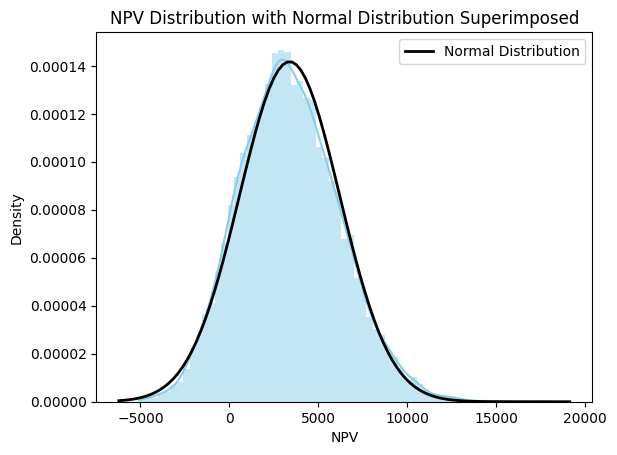

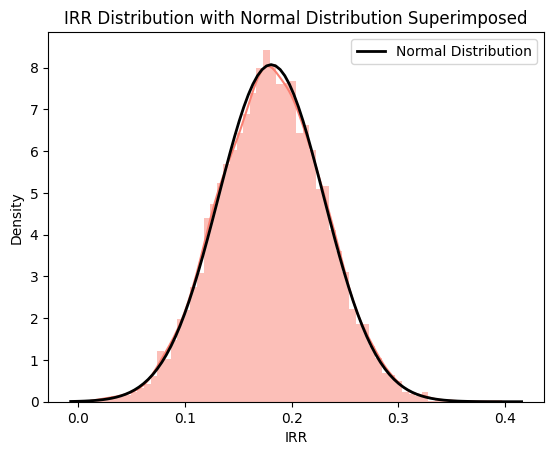

In [ ]:
# Import necessary libraries
import numpy as np
import numpy_financial as npf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to generate Monte Carlo simulations
def monte_carlo_simulation(corr=0.5, seed=0, simulations=10000):
    # Set random seed for reproducibility
    np.random.seed(seed)

    # Mean and standard deviations for the variables
    means = np.array([2000, 2000, 0.06, 5, 0.30])  # Mean values for each variable
    stds = np.array([500, 200, 0.04, 0.25, 0.03])  # Standard deviations for each variable

    # Create the correlation matrix
    corr_matrix = np.full((5, 5), corr)
    np.fill_diagonal(corr_matrix, 1)  # Diagonal elements = 1 (correlation of a variable with itself)

    # Perform Cholesky decomposition to obtain a lower triangular matrix
    chol_matrix = np.linalg.cholesky(corr_matrix)

    # Generate uncorrelated random numbers from a normal distribution
    uncorrelated_random_numbers = np.random.normal(size=(simulations, 5))

    # Correlate the random numbers using the Cholesky matrix
    correlated_random_numbers = uncorrelated_random_numbers @ chol_matrix.T

    # Apply the transformation to each variable: Correlated random number * std + mean
    simulated_values = correlated_random_numbers * stds + means

    return simulated_values

# Calculate NPV and IRR for each Monte Carlo simulation
def run_monte_carlo_simulation():
    # Generate 10,000 Monte Carlo scenarios
    simulations = 10000
    simulated_values = monte_carlo_simulation(corr=0.5, seed=0, simulations=simulations)

    # Prepare lists for storing NPV and IRR values
    npv_values = []
    irr_values = []

    # Iterate over each simulation and calculate NPV and IRR
    for sim in simulated_values:
        salvage_value, unit_sales_year1, sales_growth, sale_price_per_unit, cash_operating_expenses_percentage = sim

        # Calculate NPV and IRR for this set of inputs
        npv, irr = calculate_npv_irr(salvage_value, unit_sales_year1, sales_growth, sale_price_per_unit, cash_operating_expenses_percentage)

        npv_values.append(npv)
        irr_values.append(irr)

    # Convert lists to numpy arrays for statistical analysis
    npv_values = np.array(npv_values)
    irr_values = np.array(irr_values)

    # Calculate statistics for NPV and IRR
    npv_mean = np.mean(npv_values)
    npv_std = np.std(npv_values)
    npv_skewness = stats.skew(npv_values)
    npv_kurtosis = stats.kurtosis(npv_values)
    npv_quantiles = np.percentile(npv_values, [10, 25, 50, 75, 90])

    irr_mean = np.mean(irr_values)
    irr_std = np.std(irr_values)
    irr_skewness = stats.skew(irr_values)
    irr_kurtosis = stats.kurtosis(irr_values)
    irr_quantiles = np.percentile(irr_values, [10, 25, 50, 75, 90])

    # Print statistics for NPV and IRR
    print("NPV Statistics:")
    print(f"Mean: {npv_mean:.2f}")
    print(f"Std: {npv_std:.2f}")
    print(f"Skewness: {npv_skewness:.2f}")
    print(f"Kurtosis: {npv_kurtosis:.2f}")
    print(f"Quantiles (10, 25, 50, 75, 90): {npv_quantiles}")

    # Plot NPV distribution with normal distribution
    sns.histplot(npv_values, kde=True, stat="density", color="skyblue", linewidth=0)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, npv_mean, npv_std)
    plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
    plt.title("NPV Distribution with Normal Distribution Superimposed")
    plt.xlabel("NPV")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    # Plot IRR distribution with normal distribution
    sns.histplot(irr_values, kde=True, stat="density", color="salmon", linewidth=0)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, irr_mean, irr_std)
    plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
    plt.title("IRR Distribution with Normal Distribution Superimposed")
    plt.xlabel("IRR")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print("\nIRR Statistics:")
    print(f"Mean: {irr_mean:.2%}")
    print(f"Std: {irr_std:.2%}")
    print(f"Skewness: {irr_skewness:.2f}")
    print(f"Kurtosis: {irr_kurtosis:.2f}")
    print(f"Quantiles (10, 25, 50, 75, 90): {irr_quantiles}")

# Run the simulation
run_monte_carlo_simulation()